<a href="https://colab.research.google.com/github/Apollo9999/Wave2WEBHACK/blob/main/EDA/KRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Wave2web/'

'2019-20 Agri excel.xlsx'
'District-wise Depth to water Level and Distribution of Percentage of Wells for the Period of Premonsoon, 2018 in Karnataka (2).xlsx'
'DIST-WISE FRQ TEALE OF MAY2019 for website.xlsx.xlsx'
 GroundwaterLevelSpatialDataProject-master.zip
 Harangi.csv
 Hemavathi.csv
 kabini.csv
'Kerala-District wise - Rainfall Data(2016-2020)'
 Kerala-Rainfall-Historical.csv
 KRS.csv
'_Preparation for Concept Note.docx'
'rainfall-data-for-karnataka_2008-2018 (4).xls'
'Rainfall data maharshtra.xlsx'
 rainfall_vs_ksr.csv
 Wave2Web_hack_ppt.pptx
 Wave2WebHack_Team_Arghyam.csv
 wavetowebEDA.ipynb


In [ ]:
krs = pd.read_csv('/content/gdrive/My Drive/Wave2web/KRS.csv')

In [ ]:
print("KRS : ", krs.shape)

KRS :  (3313, 10)


In [ ]:
krs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3313 non-null   int64  
 1   RESERVOIR            3313 non-null   object 
 2   YEAR                 3313 non-null   int64  
 3   WEEK_NO              3313 non-null   int64  
 4   FLOW_DATE            3313 non-null   object 
 5   PRESENT_STORAGE_TMC  3313 non-null   float64
 6   RES_LEVEL_FT         3313 non-null   object 
 7   INFLOW_CUSECS        3313 non-null   object 
 8   OUTFLOW_CUECS        3313 non-null   int64  
 9   UNIQUE_KEY           3313 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 259.0+ KB


In [ ]:
krs.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,51,K.R.S,2011,1,2011-01-01,46.42,122.59,2029,2000,K.R.S-2011-01-01
1,52,K.R.S,2011,1,2011-01-02,46.54,122.68,3084,1490,K.R.S-2011-01-02
2,53,K.R.S,2011,1,2011-01-03,46.64,122.75,2776,1491,K.R.S-2011-01-03
3,54,K.R.S,2011,1,2011-01-04,46.69,122.79,2311,1491,K.R.S-2011-01-04
4,55,K.R.S,2011,1,2011-01-05,46.70,122.80,1847,1491,K.R.S-2011-01-05


In [ ]:
krs.FLOW_DATE = pd.to_datetime(krs.FLOW_DATE)

In [ ]:
# convert object to numeric
krs['INFLOW_CUSECS'] = pd.to_numeric(krs.INFLOW_CUSECS, errors='coerce')

In [ ]:
krs['RES_LEVEL_FT'] = pd.to_numeric(krs.RES_LEVEL_FT, errors='coerce')

In [ ]:
krs.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,51,K.R.S,2011,1,2011-01-01,46.42,122.59,2029.0,2000,K.R.S-2011-01-01
1,52,K.R.S,2011,1,2011-01-02,46.54,122.68,3084.0,1490,K.R.S-2011-01-02
2,53,K.R.S,2011,1,2011-01-03,46.64,122.75,2776.0,1491,K.R.S-2011-01-03
3,54,K.R.S,2011,1,2011-01-04,46.69,122.79,2311.0,1491,K.R.S-2011-01-04
4,55,K.R.S,2011,1,2011-01-05,46.70,122.80,1847.0,1491,K.R.S-2011-01-05


In [ ]:
krs.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3313.000000,3313.000000,3313.000000,3313.000000,3312.000000,3312.000000,3313.000000
mean,22243.906731,2015.733172,27.738605,28.056453,102.630927,4911.881341,4841.711138
std,12762.354003,2.827366,14.926730,14.358629,17.406130,10690.118107,9499.776372
min,51.000000,2010.000000,1.000000,0.000000,62.800000,0.000000,0.000000
25%,11135.000000,2014.000000,15.000000,14.310000,87.390000,319.000000,715.000000
50%,22489.000000,2016.000000,29.000000,27.380000,105.450000,1717.000000,3703.000000
75%,33274.000000,2018.000000,41.000000,42.100000,119.320000,5433.500000,5161.000000
max,43919.000000,2020.000000,52.000000,49.450000,124.800000,204200.000000,151365.000000


https://en.wikipedia.org/wiki/Krishna_Raja_Sagara

In [ ]:
krs.loc[krs['OUTFLOW_CUECS'] == 151365]


,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
1636,22217,K.R.S,2019,32,2019-08-12,41.63,122.3,204200.0,151365,K.R.S-2019-08-12


https://weather.com/en-IN/india/news/news/2020-01-08-top-5-biggest-floods-affect-india-2019

Floods at above date. but there is no proof that kabini outflow is that much.


In [ ]:
fig = px.box(x = krs["OUTFLOW_CUECS"] )
fig.show()

lot of outlier points are there.



2016    366
2019    365
2017    365
2015    365
2011    365
2018    365
2014    364
2020    333
2013    216
2012    207
2010      2
Name: YEAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



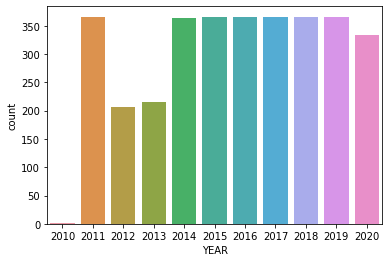

In [ ]:
print(krs["YEAR"].value_counts())
sns.countplot(krs["YEAR"])


Only 2 months data and few less records for 2012 and 2013 for kabini

In [ ]:
krs_indexed = krs.set_index('FLOW_DATE')

In [ ]:
krs_indexed.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-01,51,K.R.S,2011,1,46.42,122.59,2029.0,2000,K.R.S-2011-01-01
2011-01-02,52,K.R.S,2011,1,46.54,122.68,3084.0,1490,K.R.S-2011-01-02
2011-01-03,53,K.R.S,2011,1,46.64,122.75,2776.0,1491,K.R.S-2011-01-03
2011-01-04,54,K.R.S,2011,1,46.69,122.79,2311.0,1491,K.R.S-2011-01-04
2011-01-05,55,K.R.S,2011,1,46.70,122.80,1847.0,1491,K.R.S-2011-01-05


In [ ]:
fig = px.line(data_frame = krs, x = 'FLOW_DATE', y='INFLOW_CUSECS')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
krs_indexed['year'] = [x.year for x in krs_indexed.index]

In [ ]:
fig = px.line(data_frame=krs_indexed, y='INFLOW_CUSECS', color='year')
fig.show()

In [ ]:
weeklykrs = krs_indexed.groupby(['year','WEEK_NO']).mean()

In [ ]:
weeklykrs.shape

(475, 6)

In [ ]:
weeklykrs.head()

SL_NO    YEAR  ...  INFLOW_CUSECS  OUTFLOW_CUECS
year WEEK_NO                   ...                              
2010 39       13062.0  2010.0  ...    2706.000000    6840.000000
     52       13231.0  2010.0  ...    2668.000000    6795.000000
2011 1           54.0  2011.0  ...    2292.857143    1563.571429
     2          138.0  2011.0  ...    1553.714286    2813.000000
     3          222.0  2011.0  ...    2076.428571    5085.428571

[5 rows x 6 columns]

In [ ]:
fig = px.line(data_frame=weeklykrs, y='INFLOW_CUSECS', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklyksr, y='OUTFLOW_CUECS', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklykrs, y='RES_LEVEL_FT', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklykrs, y='PRESENT_STORAGE_TMC', color='YEAR')
fig.show()